# Importações

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Evolução Mensal


## 1. Tratamento de Dados

### 1.1 MonitorAr

#### Lê os ``.csv``s

Monitores

In [ ]:
def get_monitors(cols=None):
    jan_mar_df = pd.read_csv("../data/monitor_ar/Dados_monitorar_jan_mar.csv", encoding="latin", sep=";", usecols=cols)
    abr_jun_df = pd.read_csv("../data/monitor_ar/Dados_monitorar_abr_jun.csv", encoding="latin", sep=";", usecols=cols)
    jul_nov_df = pd.read_csv("../data/monitor_ar/Dados_monitorar_jul_nov.csv", encoding="latin", sep=";", usecols=cols)

    # Junta as três tabelas de monitores
    monitors_df = pd.concat([jan_mar_df, abr_jun_df, jul_nov_df], axis=0)

    return monitors_df

monitors_cols=[
    '', 'Nome do Município', 'Estado', 'Nome da Estação', 'Sigla', 'Concentracao', 'iqar', 'Data'
]
monitors_df = get_monitors(monitors_cols)

monitors_df.rename(columns = {
    "Nome do Município": "Nome_Municipio",
    "Nome da Estação": "Nome_Estacao"
}, inplace=True)

C:\Users\Aluno\AppData\Local\Temp\ipykernel_15336\4180103939.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  jul_nov_df = pd.read_csv("../data/monitor_ar/Dados_monitorar_jul_nov.csv", encoding="latin", sep=";", usecols=cols)


#### 2. Filtrar Monitoramentos que possuem ``iqar``

In [20]:
monitors_df['iqar'] = pd.to_numeric(monitors_df['iqar'], errors='coerce')

monitors_df = monitors_df.dropna(subset=['iqar'])

### 1.2 DataSUS

#### Lê o ``.csv``

In [5]:
cols = [
    'CO_MUN_RES'
]
    
datasus_df = pd.read_csv("../data/data_sus/INFLUD22-26-06-2025.csv", sep=";", usecols=cols)

municipios_code = datasus_df.rename(columns={
    "CO_MUN_RES": "Codigo_IBGE"
})

municipios_code.dropna(subset=['Codigo_IBGE'], inplace=True)
municipios_code["Codigo_IBGE"] = municipios_code["Codigo_IBGE"].astype(int)
municipios_code.drop_duplicates(subset=['Codigo_IBGE'])
municipios_code = municipios_code['Codigo_IBGE']

### 2. Plotar o gráfico

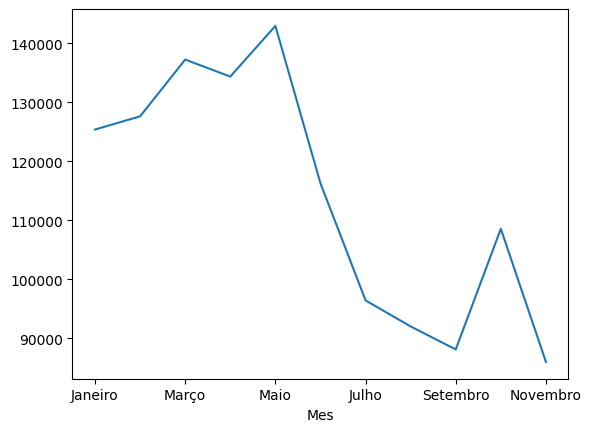

In [19]:
monitors_df['Data'] = pd.to_datetime(monitors_df['Data'])
monitors_df['Mes'] = monitors_df['Data'].dt.month_name(locale='pt_BR')

monitors_df.sort_values(by='Data', inplace=True)

month_count = monitors_df.groupby('Mes',sort=False).size()

ax = month_count.plot(x='Mes')

plt.show()